# Homework 1: Cancer Diagnosis Using Machine Learning
## Fabio Carrasco

In [61]:
import pandas as pd

### I- Read the dataset file “Cancer.csv” (from github using the following command), and assign it to a Pandas DataFrame:

In [62]:
df  = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")
df.head

<bound method NDFrame.head of      Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
145                3                        1                         1   
146                9                        7                         7   
147               10                        8                         8   
148                1                        1                         1   
149                5                        1                         1   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0

In [63]:
y = df['Malignant_Cancer']
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    1
147    1
148    0
149    0
Name: Malignant_Cancer, Length: 150, dtype: int64>

### II- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=2.

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df.loc[:, df.columns != 'Malignant_Cancer']
X

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1
146,9,7,7,5,5,10,7,8,3
147,10,8,8,4,10,10,8,1,1
148,1,1,1,1,2,1,3,1,1


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=2)

### III- Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets that you built in part (II). Then, calculate and report the accuracy and AUC of your classifier. Later in part (VII), you will plot the ROC curve as well. Use this command to define your tree: my_DecisionTree = DecisionTreeClassifier(random_state=2).

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [68]:
my_DecisionTree = DecisionTreeClassifier(random_state=2)
my_DecisionTree.fit(X_train, y_train)
y_predict_dt = my_DecisionTree.predict(X_test)
y_predict_prob_dt = my_DecisionTree.predict_proba(X_test)
score_dt = accuracy_score(y_test, y_predict_dt)
print(score_dt)

0.8666666666666667


In [69]:
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)
AUC1 = metrics.auc(fpr1, tpr1)
print(AUC1)

0.8697478991596639


### IV- Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”. Note: you should write your own code to perform Bagging (don’t use scikit-learn functions for Bagging!)

In [70]:

from sklearn.utils import resample

In [71]:
predictions = []
for i in range(28):
    bootstrap_size = int(.8*len(X_train))
    X_train_i, y_train_i = resample(X_train, y_train, n_samples = bootstrap_size , random_state=i , replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(X_train_i, y_train_i)
    y_predict = Base_DecisionTree.predict(X_test)
    predictions.append(y_predict)
highest_count = 0
highest_voted = predictions[0]
for i in range(28):
    one_count = list(predictions[i]).count(1)
    # print(one_count)
    if(one_count > highest_count):
        # print(one_count)
        highest_count = one_count
        highest_voted = predictions[i]
# print(elem_highest)
# print(highest_count)
score_dt = accuracy_score(y_test, highest_voted)
print(score_dt)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, highest_voted, pos_label=1)
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

0.9333333333333333
0.9117647058823529


### V- Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:

In [72]:
from   sklearn.ensemble   import     AdaBoostClassifier

In [73]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_predict = my_AdaBoost.predict(X_test)
score = accuracy_score(y_test, y_predict)
print(score)
fpr3, tpr3, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
AUC3 = metrics.auc(fpr3, tpr3)
print(AUC3)

0.9555555555555556
0.9527310924369748


### VI- In this section, we use another decision tree boosting technique called "gradient boosting" with its very popular and super efficient implementation “XGBoost” that stands for "Extreme Gradient Boosting." This algorithm is not included in sklearn, so you need to install the XGBoost library. 

In [74]:
from   xgboost   import   XGBClassifier

In [75]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(X_train, y_train)
y_predict = my_XGBoost.predict(X_test)
score = accuracy_score(y_test, y_predict)
print(score)
fpr4, tpr4, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
AUC4 = metrics.auc(fpr4, tpr4)
print(AUC4)

0.9555555555555556
0.9527310924369748


### VII- Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing datasets that you built in part (II). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:

In [76]:
from   sklearn.ensemble    import    RandomForestClassifier

In [77]:
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)
score = accuracy_score(y_test, y_predict)
print(score)
fpr5, tpr5, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
AUC5 = metrics.auc(fpr5, tpr5)
print(AUC5)

0.9555555555555556
0.9411764705882353


### VIII- Now, plot the ROC curves of your algorithms in parts (III), (IV), (V), (VI), (VII) in a single plane with different colors along with the name of each method. Show the AUCs on the graph as well.

In [78]:

import matplotlib.pyplot as plt

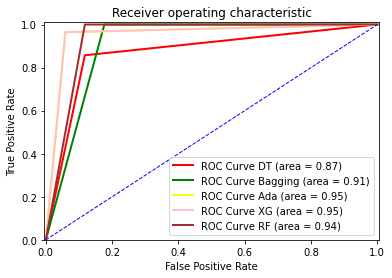

In [79]:
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr1, tpr1, color='red', lw=2, 
         label='ROC Curve DT (area = %0.2f)' % AUC1)

# Roc Curve2:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve Bagging (area = %0.2f)' % AUC2)

# Roc Curve3:
plt.plot(fpr3, tpr3, color='yellow', lw=2, 
         label='ROC Curve Ada (area = %0.2f)' % AUC3)

# Roc Curve4:
plt.plot(fpr4, tpr4, color='pink', lw=2, 
         label='ROC Curve XG (area = %0.2f)' % AUC4)

# Roc Curve5:
plt.plot(fpr5, tpr5, color='brown', lw=2, 
         label='ROC Curve RF (area = %0.2f)' % AUC5)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Which algorithm is the best w.r.t the AUC value?
### From my results both Ada and XG are the best algorithms wrt AUC value.
## Which algorithm is the best w.r.t the Accuracy value?
### From my results 
## Which algorithm is the best when we want a False Positive Rate of %7?
 